In [1]:
%run ../../common/import_all.py

import time
from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython

config_ipython()
setup_matplotlib()
set_css_style()

# Sorting algorithms

We will illustrate how different sorting algorithms work, using array

$$
\boxed{6}\boxed{5}\boxed{3}\boxed{1}\boxed{8}\boxed{7}\boxed{2}\boxed{4}
$$

as the example. This array is used in the Wikipedia pages of these algorithms. We will assume that the task is to sort the array in the ascending order (from the smallest to the largest element), but all the discussion is easily mirrored for the opposite ordering.

Note that this overview is far from being comprehensive of all possible existing algorithms for sorting!

In [2]:
array = [6, 5, 3, 1, 8, 7, 2, 4]

## Mergesort

It is a *divide and conquer* algorithm and applies repeated comparison: the array (of length $n$) is first divided into its single components and then bigger and bigger chunks are merged together to recompose the original array, but sorted.

### The algorithm

1. In the initial stage, the array starts by being divided iteratively into halves until it gets to the level of the cells of each single component. If the array is not even in size, the initial two halves will have different lengths. In our example case we have

    $$
    \boxed{6}\ \ \ \boxed{5}\ \ \ \boxed{3}\ \ \ \boxed{1}\ \ \ \ \boxed{8}\ \ \ \boxed{7}\ \ \ \boxed{2}\ \ \ \boxed{4}
    $$

2. Now we need to create couples (subsets of two elements) by merging the single elements two by two. The way we do this is comparing couples of adjacent elements and sort them

    $$
    \boxed{5}\boxed{6}\ \ \ \boxed{1}\boxed{3}\ \ \ \ \boxed{7}\boxed{8}\ \ \ \boxed{2}\boxed{4}
    $$

3. Now time for merging into subsets of four elements. We compare adjacent couples for the job: compare the first element of the first with the first element of the second and choose the smallest and put it aside (there is no point in comparing the second elements of the first couple with the first of the second as couples are ordered); then the remaining element of the first couple with the remaining element of the other couple (remaining here stands for the one staying there after the isolation, whichever it is) and so on

    *specifically, in our example we need to merge couples $\boxed{5}\boxed{6}$ and  $\boxed{1}\boxed{3}$, so we proceed by comparing 5 to 1, and choose 1; we are left with $\boxed{5}\boxed{6}$ and  $\boxed{3}$, so we compare 5 to 3 and choose 3; we are then left with $\boxed{1}\boxed{3}\boxed{5}\boxed{6}$*

    $$
    \boxed{1}\boxed{3}\boxed{5}\boxed{6}\ \ \ \ \boxed{2}\boxed{4}\boxed{7}\boxed{8}
    $$

4. Now merge into subsets of eight by using the same procedure: start by comparing the first elements of the two first 4-subsets, choose the smallest; then keep comparing whatever is left on the first subset to what is left on the second subset. Eventually, this leads to 

    $$\boxed{1}\boxed{2}\boxed{3}\boxed{4}\boxed{5}\boxed{6}\boxed{7}\boxed{8}$$

A great visual representation of the procedure can be seen in [[1]](#merge-viz).

### Complexity

It is a $O(n \log n)$ algorithm, in the worst, best and average cases, because the splits are $O(\log n)$ and there are $n$ comparisons at each split.

### An implementation

Note that this implementation, which is recursive, is inspired by [[1]](#mergesort-so).

In [3]:
def mergesort(my_array):

    if len(my_array) == 1:
        return my_array

    new = []
    n = len(my_array)
    midpoint = int(n/2)

    right = mergesort(my_array[:midpoint])
    left = mergesort(my_array[midpoint:])

    while len(right) > 0 and len(left) > 0:
            if right[0] > left[0]:
                new.append(left[0])
                left.pop(0)
            else:
                new.append(right[0])
                right.pop(0)
     
    new += right + left
        
    return new

mergesort(array)

[1, 2, 3, 4, 5, 6, 7, 8]

## Bubble sort

It is called this way because smaller items iteratively walk up ("bubble") the top of the array. The algorithm works in such a way that the array is walked repeatedly and adjacent items are swapped if they are in the reverse order.

### The algorithm

* First round of walking the array:
    * Let's start from the example array above and start comparing the first two elements, $5 < 6$, so we swap them, creating $\boxed{5}\boxed{6}\boxed{3}\boxed{1}\boxed{8}\boxed{7}\boxed{2}\boxed{4}$
    * After this, we proceed on the next couple in line, $3 < 6$ and we produce another swap
    * We continue like this, always comparing the next couple in line, eventually ending up with array $\boxed{5}\boxed{3}\boxed{1}\boxed{6}\boxed{7}\boxed{2}\boxed{4}\boxed{8}$, which concludes the first round
* Secound round of walking the array:
    * We proceed in exactly the same way, starting to compare couples from the start again
* ...
* We will eventually end up with a totally sorted array

A great visual representation of the procedure can be seen in [[2]](#bubble-viz).

### Complexity

The complexity of bubble sort is $O(n^2)$ in the worst and average case, $O(n)$ in the best case (no swaps, meaning array is already sorted). This makes for a bad algorithm in general in terms of performance, due to all the repeated checks it does. It is a quite inefficient algorithm!

### An implementation

Which is also recursive.

In [5]:
def bubblesort(my_array):
    
    my_array_copy = my_array.copy()
    n = len(my_array_copy)
    
    if (all([my_array_copy[i] < my_array_copy[i+1] for i in range(n-1)])):
        return my_array_copy
        
    for i in range(n-1):
        if my_array_copy[i] > my_array_copy[i + 1]:
            my_array_copy[i], my_array_copy[i+1] = my_array_copy[i+1], my_array_copy[i]
   
    my_array_copy = bubblesort(my_array_copy)

    return my_array_copy

bubblesort(array)

[1, 2, 3, 4, 5, 6, 7, 8]

## Insertion sort

Insertion sort works in such a way that each element gets pushed to its right location by doing all comparisons with the elements in front of it.

### The algorithm

1. In the case of our array, start with 6 which is the first number
2. Now 5 is smaller than 6, so move it, obtaining $\boxed{5}\boxed{6}\boxed{3}\boxed{1}\boxed{8}\boxed{7}\boxed{2}\boxed{4}$
3. Proceed on to the next number, which is 3, and move it to the top, obtaining $\boxed{3}\boxed{5}\boxed{6}\boxed{1}\boxed{8}\boxed{7}\boxed{2}\boxed{4}$
4. Now on to 1, which gets moved to the top in the same way
5. Now 8, which stays there
6. Now 7, which gets placed right before the 8, ending up with $\boxed{1}\boxed{3}\boxed{5}\boxed{6}\boxed{7}\boxed{8}\boxed{2}\boxed{4}$
7. ...
8. Eventually you'll have a sorted array

### Complexity 

In the worst and average case, this is a $O(n^2)$ algorithm, in the best case it is a $O(n)$ one (it does $n$ comparisons, this is the case when the array is already sorted. 

### Implementation

In [7]:
def insertionsort(my_array):
    
    my_array_copy = my_array.copy()
    n = len(my_array_copy)
    
    for i in range(1, n):
        for j in range(i):
            if my_array_copy[i] < my_array_copy[j]:
                my_array_copy[i], my_array_copy[j] = my_array_copy[j], my_array_copy[i]
                
    return my_array_copy

insertionsort(array)

[1, 2, 3, 4, 5, 6, 7, 8]

## Selection sort

This algorithm is somehow similar to the insertion sort. It works by building two lists out of the original array: the sorted one built iteratively and the rest, which shrinks till becoming empty. Have a look at the viz in [[3]](#sel-viz) for an example.

### The algorithm

1. Initially, the sorted list is empty
2. Find the smallest elements in the unsorted list and swap it with the leftmost one, so that in our example we get $\boxed{1}\boxed{5}\boxed{3}\boxed{6}\boxed{8}\boxed{7}\boxed{2}\boxed{4}$: this way the sorted list contains 1 and the rest has one element less
3. Proceed on the next element and keep doing the same till everything is sorted

### Complexity

The complexity is $O(n^2)$ in the best, worst and average case. This is because you have $n-1$ comparisons to find the lowest element, $n-2$ to find the second lowest, ... and so on, effectively meaning you will do $(n-1) + (n-2) + \ldots + 1 = \frac{n(n-1)}{2}$ comparisons.

## Heapsort 

Heapsort [[2]](#heapsort-paper) works on the same philosophy of selection sort but uses a [heap structure](../data-structures.ipynb#Heap) to find the minimum rather than employing a linear time lookup. 

### The algorithm

1. Build the (min) heap
2. The sorted array is build by repeatedly extracting the root of the heap (the minimum element) and add to array
3. Keep going, updating the heap each time

### Complexity 

The complexity of heapsort is $O(n \log n)$ in all cases. This is because the heap is built in $O(n)$ time and finding the needed element each time is a $O(\log n)$ operation given the length of heap is $\log n$, with $n$ calls this gives $O(n \log n)$, so a total of $O(n + n \log n) \approx O(n \log n)$.

### Quicksort

It is a more efficient that mergesort and heapsort, was published in 1962 [[3]](#quicksort-paper). 

### The algorithm

Note that many great examples with step to step approaches are present on the internet, look for instance [[4]](#quick-viz) and [[5]](#quick-video).

The algorithm is a divide and conquer one which works by splitting the array into two chunks and sorting them separately and iterating the procedure recursively. 

1. Pick an item from the array, call it *pivot*: in our case let's choose the first one (6)
2. Sort the elements in such a way that all those smaller than the pivot go before it, all those greater than the pivot go after it (*partition* phase), the goal here is to locate the split point, which is where the pivot has to be placed:
    * Start by placing right and left markers as respectively the last element (4) and the one next to the pivot (5), 
    * you need move the right marker to the first element which is smaller than the pivot and the left marker to the first element which is larger than the pivot by moving them one cell at a time in their respective directions (right towards left and left towards right): in our case find 8 (right marker itself) and 4 (first element smaller than pivot moving the left marker)
    * switch these elements, obtaining array $\boxed{6}\boxed{5}\boxed{3}\boxed{1}\boxed{4}\boxed{7}\boxed{2}\boxed{8}$, and now right marker is in 8 and left marker in 4 (where they were before the switch)
    * proceed with the same checks now, finding 7 for the right marker and 2 for the left marker
    * exchange them, getting $\boxed{6}\boxed{5}\boxed{3}\boxed{1}\boxed{4}\boxed{2}\boxed{7}\boxed{8}$, with right marker in 7 and left marker in 2
    * now if you move the markers, they cross, a sign that you found the right position of the pivot in the order: have to switch the pivot itself with the new value of right (the one after the markers crossing), obtaining $\boxed{2}\boxed{5}\boxed{3}\boxed{1}\boxed{4}\boxed{6}\boxed{7}\boxed{8}$
    * at this point the pivot (6) is in its right place in the ordering as all elements before it are smaller and all elements after it are larger and you got two subarrays to order
    * proceed on each of the subarrays in the same way with their pivot and markers, so the whole procedure is recursive


### Complexity

The complexity is $O(n \log n)$ in the best and average case, $O(n^2)$ in the worst case. 

The worst case verifies when the pivot divides the array into two groups of 0 and $n-1$ items, which then recursively become groups of 0 and $n-2$ items ... leading to $O(n^2)$ comparisons. This happens for sorted arrays. The best case verifies when each split divides the array into two groups of comparable length, which implies each recursive call processes an array of half the size: $\log n$ calls are made as you are splitting $n$ recursively until you reach length 1, so for instance with $n=32$ you go to 16, 8, 4, 2, 1 in 5 calls, which is $\log 32$. At ech level there are then $O(n)$ comparisons, so we get an overall $O(n \log n)$. 

The average case can be proven by solving the recursive relation, you can read it on [Wikipedia](https://en.wikipedia.org/wiki/Quicksort#Average-case_analysis).

### Implementation

This code here is admittedly awful (quite imperative). Also note that unlike the previous ones, this method is modifying the original array so to not lose the original order it is better to pass a copy.

In [9]:
def quicksort(my_array, pivot_index, end_index):
            
    my_array_slice = my_array[pivot_index: end_index]
        
    if len(my_array_slice) <= 1:
        return
    
    pivot = my_array[pivot_index]
                
    l, r = pivot_index + 1, end_index - 1

    while l <= r - 1:
                
        i = r
        while i > pivot_index:
            if my_array[i] < pivot:
                break
            i -= 1
        r = i
                
        i = l
        while i < end_index:
            if my_array[i] >= pivot:
                break
            i += 1
        l = i

        if l <= r:
            my_array[l], my_array[r] = my_array[r], my_array[l]
        
    if l < r:
        my_array[l], my_array[pivot_index] = my_array[pivot_index], my_array[l]
    elif l == r:
        if my_array[l] < my_array[pivot_index]:
            my_array[l], my_array[pivot_index] = my_array[pivot_index], my_array[l]
    else:
        my_array[r], my_array[pivot_index] = my_array[pivot_index], my_array[r]

    new_pivot_index = my_array.index(pivot)
    my_array_slice = my_array[pivot_index: end_index]
    
    right = my_array_slice[pivot_index: new_pivot_index]
    left = my_array_slice[my_array_slice.index(pivot) + 1:]
    
    quicksort(my_array, 0, len(right))
    quicksort(my_array, new_pivot_index + 1, new_pivot_index + 1 + len(left))
            
    return

array_copy = array.copy()
array_copy = [7, 1, 3, 8, 2, 0]
('original array', array_copy)
quicksort(array_copy, 0, len(array_copy))
array_copy

('original array', [7, 1, 3, 8, 2, 0])

[0, 1, 2, 3, 7, 8]

## What does Python use

The `sort` and `sorted` built-in methods in Python use a very efficient algorithm called Timsort [[5]](#timsort), designed by Tim Peters specifically for use in Python itself in 2002. 

### Measurement time (!)

Let's measure the time taken by the implementations we wrote above, and by timsort, on arrays of different length. Note that we wanted to use bubblesort as well but our implementation easily exceeds recursion limits! So we will use mergesort, insertion sort and timsort. 

From the plot below you can see both the quadratic trend of insertion sort, and the fact that timsort is the most efficient one. Note that our implementation of mergesort includes some calls to `.pop`, which may add some overhead.

## Now let's run these

Going to run all these codes on arrays of various lengths, scaling as powers of ten, and measuring the time taken. Note that the implementations above may add some unneeded overhead give the way they've been written so the results here shouldn't be taken at face value. 

In [14]:
mergesort_t = []
bubblesort_t = []
insertionsort_t = []
quicksort_t = []
timsort_t = []

#n_range = [10, 100, 1000, 10000]
n_range = np.arange(1, 1000, 100)

for n in n_range:
    
    an_array = random.sample(range(n), n)
    
    t = time.process_time()
    sorted_array = mergesort(an_array)
    mergesort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = bubblesort(an_array)
    bubblesort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = insertionsort(an_array)
    insertionsort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = quicksort(an_array.copy(), 0, len(an_array))
    quicksort_t.append(time.process_time() - t)
    
    t = time.process_time()
    sorted_array = sorted(an_array)
    timsort_t.append(time.process_time() - t)

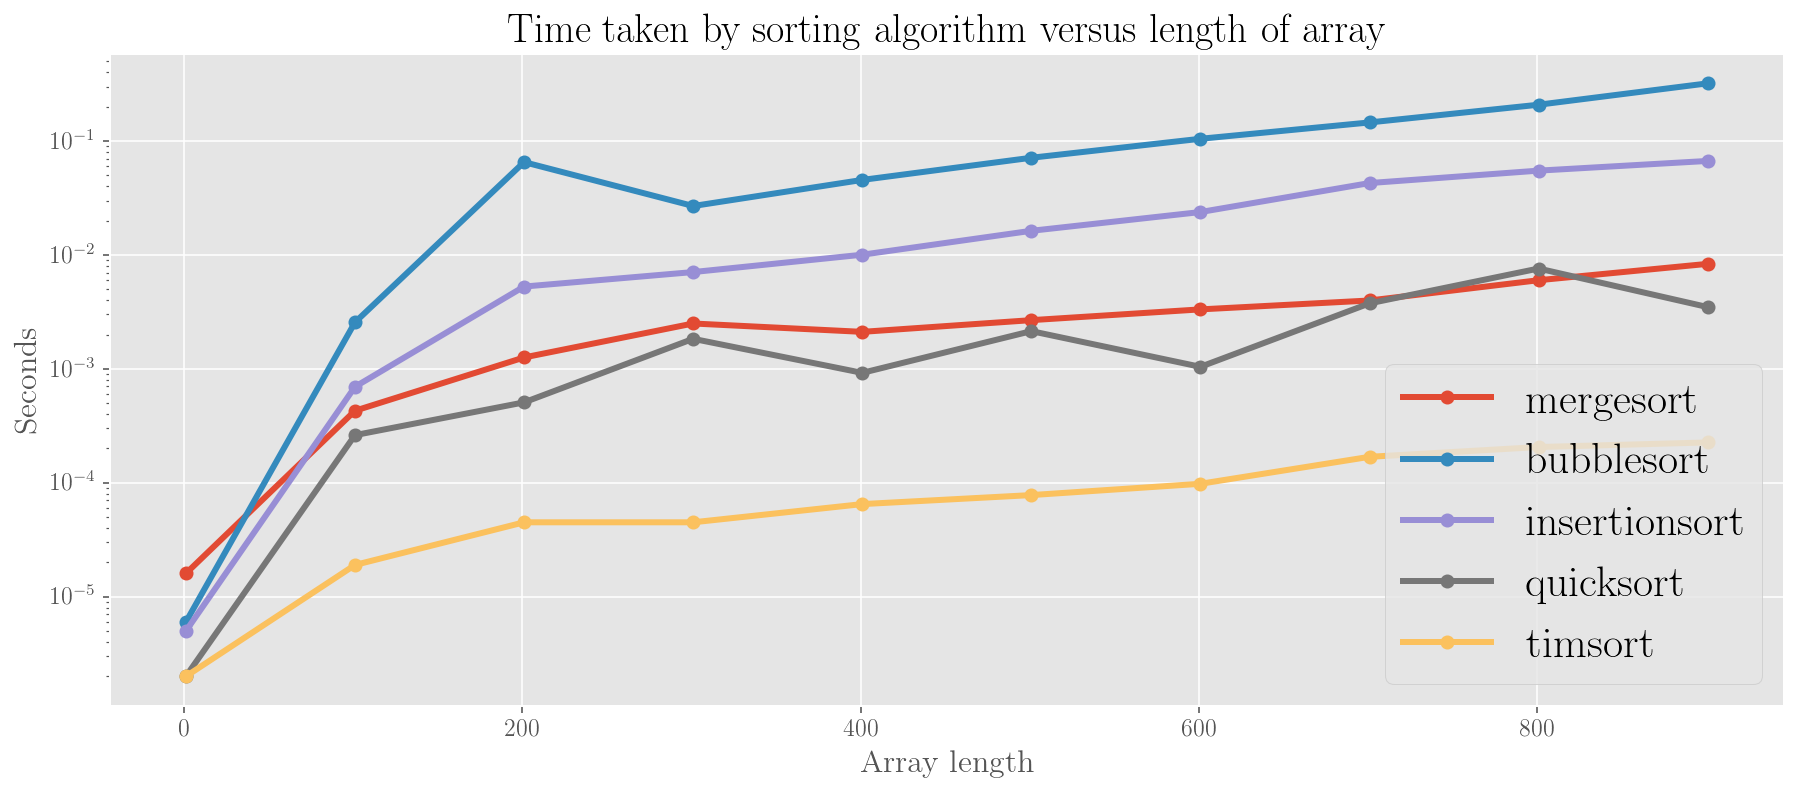

In [22]:
plt.figure(figsize=(15,6))

plt.semilogy(n_range, mergesort_t, marker='o', label='mergesort')
plt.plot(n_range, bubblesort_t, marker='o', label='bubblesort')

plt.plot(n_range, insertionsort_t, marker='o', label='insertionsort')
plt.plot(n_range, quicksort_t, marker='o', label='quicksort')
plt.plot(n_range, timsort_t, marker='o', label='timsort')

plt.legend()
plt.title('Time taken by sorting algorithm versus length of array')
plt.xlabel('Array length')
plt.ylabel('Seconds')
plt.show();

## References

1. <a name="mergesort-so"></a> [QA on StackOverflow about mergesort](https://stackoverflow.com/questions/18761766/mergesort-python)
2. <a name="heapsort-paper"></a> J W J Williams, *Algorithm 232: heapsort*, **Commun. ACM** 7, 1964
3. <a name="quicksort-paper"></a> C A R Hoare, [*Quicksort*](https://watermark.silverchair.com/api/watermark?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAbEwggGtBgkqhkiG9w0BBwagggGeMIIBmgIBADCCAZMGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMaAi7EWpRqVU9rdJSAgEQgIIBZKbS7se6zBl0kxhap8bYf-aZy292j8fOk0IHqn9XWA8-JxAduErMfXV3ofUyjcneadd1nkVJLSEYdHEHNbaRo2UVOhgnSNNF6YsLndWoXPFYETB7hnhxS2cl4fjpo-uRFITfqIPgChf-F-wmRirrSzaghH4K857rIK7DVEcqqUMaYvm9Y6YYegpseKoSFDn2LowZaoDOoH2pWDnfL5zduUkPX-TsFgAGj2h85rECOngypQvQEckOltXvxoouhzXVsCXH99oHHCOSML5s5WLheQFFDFIt7Ll5SFSsBp7Q643B0LrVoR_n1j1BiBeDknyETDdFqRivYgD3JAIJMeDHeqLAv-37-iE3Q0S5KaqVnnFOuuMvEM5hxIonOULzSYqbJlKZVF61aJ4BiLnd_9vSL2rBtHMIUiuARsHVTX0DI3Ya_Zg1CqmP_1q52txMq7XUfrknCehLX-hBBJ-rDPiCZ80xkDwX), **The Computer Journal** 5.1, 1962
4. <a name="timsort"></a> [Wikipedia on Timsort](https://en.wikipedia.org/wiki/Timsort)

### Visual examples

1. <a name="merge-viz"></a> [A **visual** example of mergesort (from Wikipedia)](https://en.wikipedia.org/wiki/Merge_sort#/media/File:Merge-sort-example-300px.gif)
2. <a name="bubble-viz"></a> [A **visual** example of bubblesort (from Wikipedia)](https://en.wikipedia.org/wiki/Bubble_sort#/media/File:Bubble-sort-example-300px.gif)
3. <a name="sel-viz"></a> [A **visual** example of selection sort](https://en.wikipedia.org/wiki/Selection_sort#/media/File:Selection-Sort-Animation.gif)
4. <a name="quick-viz"></a> [A series of **slides** about a quicksort example](https://www.cise.ufl.edu/~ddd/cis3020/summer-97/lectures/lec17/sld003.htm)
5. <a name="quick-video"></a> [A **video** about quicksort](https://www.youtube.com/watch?v=3OLTJlwyIqQ)